#Conhecendo o Dataset

## Importando a biblioteca pandas


In [55]:
import pandas as pd

##Removendo alertas de "Warning" que constam no código

In [56]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

## O dataset e o projeto
Criação de sistema de avaliação imobiliária utilizando a metodologia de regressão linear (Machine Learning).

## Leitura dos dados

In [57]:
dados = pd.read_csv('precos_imoveis_RJ.csv', sep=';')

## Visualizar os dados

In [58]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


Valor = Preço de compra do imóvel - R$

Area = Área do imóvel - m²

Dist_Praia = Distância até a praia - km

Dist_Farmacia = Distância até a farmácia - km

## Verificando o tamanho do dataset

In [59]:
dados.shape

(5000, 4)

#Análises preliminares

## Estatísticas descritivas

In [60]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Matriz de correlação


In [61]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


#Comportamento da variável dependente (Y)

## Importando biblioteca seaborn

In [62]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [63]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("ticks")

## Box plot da variável dependente (y)

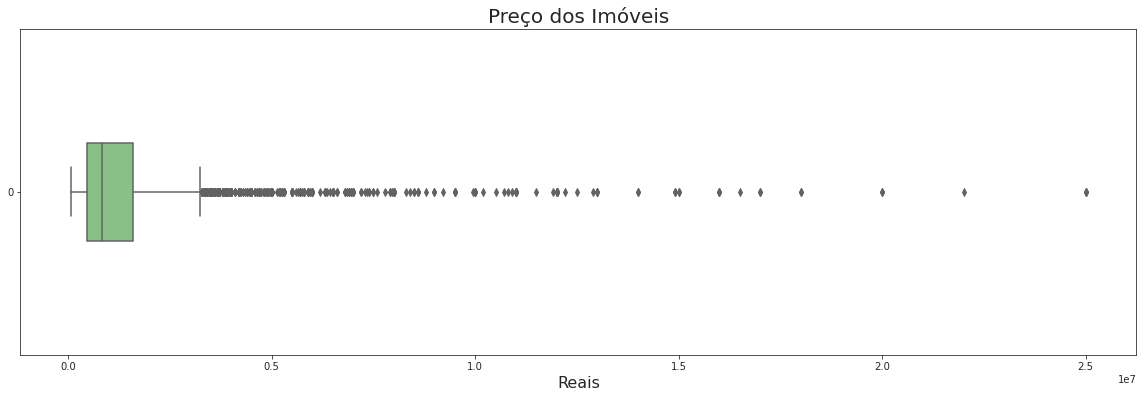

In [64]:
ax = sns.boxplot(data = dados['Valor'], orient = 'h', width = 0.3)

ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

#Distribuição de frequências

## Distribuição de frequências da variável *dependente* (y)

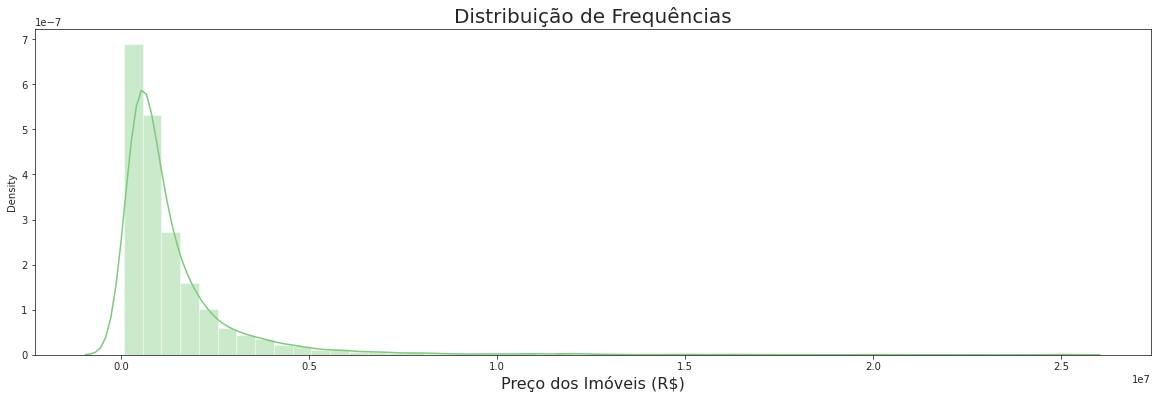

In [65]:
ax = sns.distplot(dados['Valor'],)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

<img width='800px' src='../Dados/img/Box-Plot II.png'>

#Dispersão entre as variáveis

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

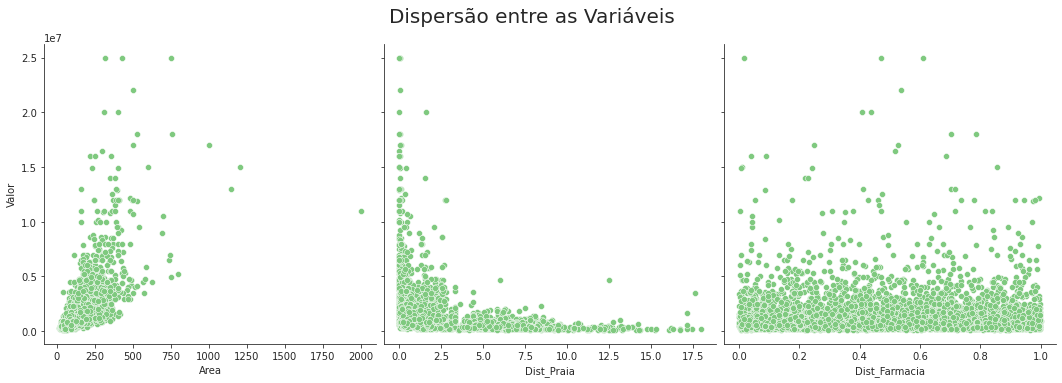

In [66]:
ax = sns.pairplot(dados, y_vars = 'Valor', x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'], height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

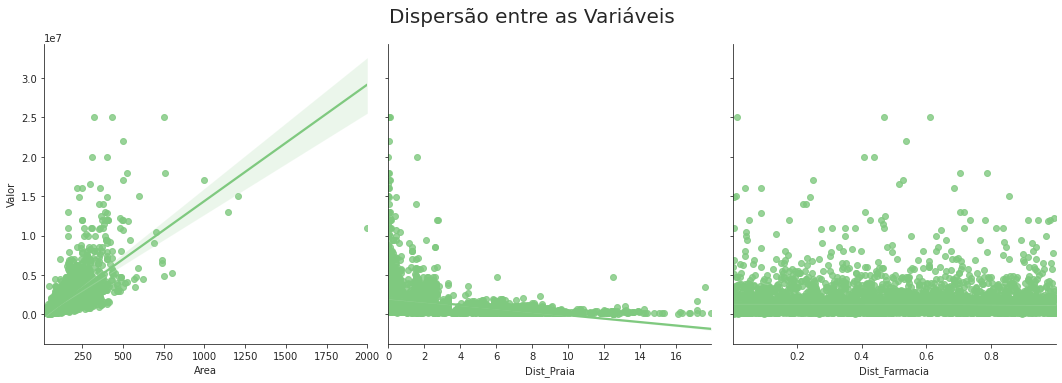

In [67]:
ax = sns.pairplot(dados, y_vars = 'Valor', x_vars = ['Area', 'Dist_Praia', 'Dist_Farmacia'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

#Transformando os dados

## Distribuição normal

## Importando biblioteca numpy

In [68]:
import numpy as np

## Aplicando a transformação logarítmica aos dados

In [69]:
np.log(0)

-inf

In [70]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [71]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Distribuição de frequências da variável dependente transformada (y)

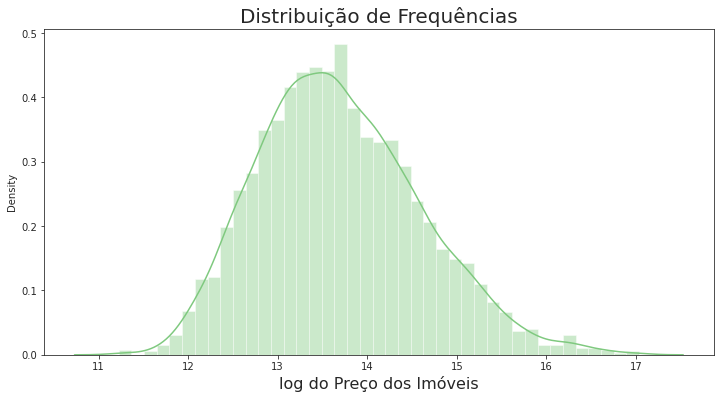

In [72]:
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

#Verificando relação linear

## Gráficos de dispersão entre as variáveis transformadas do dataset

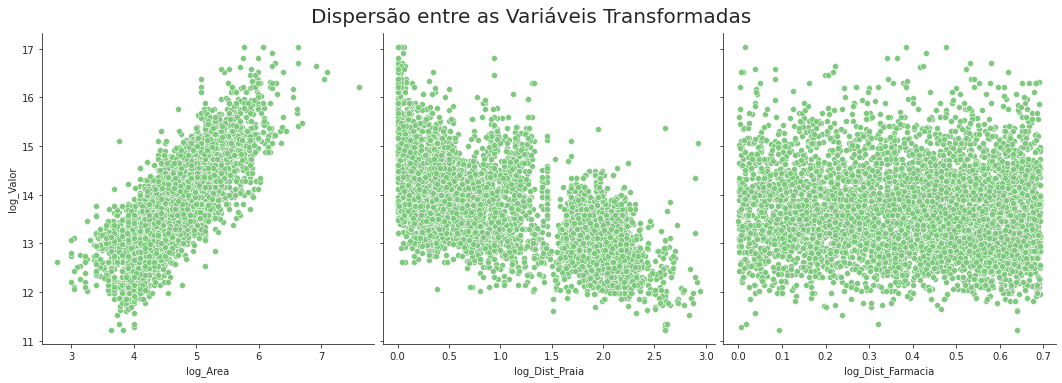

In [73]:
ax = sns.pairplot(dados, y_vars = 'log_Valor', x_vars = ['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height = 5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

#Criando os datasets de treino e teste

## Importando o *train_test_split* da biblioteca scikit-learn

In [74]:
from sklearn.model_selection import train_test_split

## Criando uma series para armazenar o preço dos imóveis (y)

In [75]:
y = dados['log_Valor']

## Criando um dataframe para armazenar as variáveis explicativas (X)

In [76]:
X = dados[['log_Area','log_Dist_Praia','log_Dist_Farmacia']]

## Criando os datasets de treino e de teste

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2811)

# Regresão linear



## Importando a biblioteca statsmodels

In [78]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [79]:
X_train_com_constante = sm.add_constant(X_train)

In [80]:
X_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [81]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

#Avaliando o modelo estimado

## Avaliando as estatísticas de teste do modelo

In [82]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:20:04   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

#Modificando o modelo e avaliando novamente o ajuste

## Criando um novo conjunto de variáveis explicativas (X)

In [83]:
X = dados[['log_Area', 'log_Dist_Praia']]

## Criando os datasets de treino e de teste

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

## Estimando o modelo com o statsmodels

In [85]:
X_train_com_constante = sm.add_constant(X_train)

In [86]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [87]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sat, 24 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:20:04   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

#Estimando o Modelo com os Dados de Treino

## Importando LinearRegression e metrics da biblioteca scikit-learn

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe LinearRegression()

In [89]:
modelo = LinearRegression()

## Utilizando o método fit() do objeto modelo

In [90]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

In [91]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


## Gerando previsões para os dados de teste utilizando o método predict()

In [92]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo


In [93]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.79


#Obtendo previsões pontuais

## Dados de entrada

In [94]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Gerando previsão pontual

In [95]:
modelo.predict(entrada)[0]

14.28482006184788

## Invertendo a transformação para obter a estimativa em R$

In [96]:
np.exp(modelo.predict(entrada)[0])

1598889.784779439

## Criando um simulador simples

In [97]:
Area = 150
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 1617664.12


#Interpretação dos coeficientes estimados

## Obtendo o intercepto do modelo

In [98]:
modelo.intercept_

9.334916409800329

In [99]:
np.exp(modelo.intercept_)

11326.681428069842

## Obtendo os coeficientes de regressão

In [100]:
modelo.coef_

array([ 1.05807818, -0.49061226])

## Confirmando a ordem das variáveis explicativas no dataframe

In [101]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [102]:
index = ['Intercepto', 'log Área', 'log Distância até a Praia']

## Criando um dataframe para armazenar os coeficientes do modelo

In [103]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
Intercepto,9.334916
log Área,1.058078
log Distância até a Praia,-0.490612


## Interpretação dos coeficientes estimados

#Análises gráficas dos resultados do modelo

## Gerando as previsões do modelo para os dados de treino

In [104]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

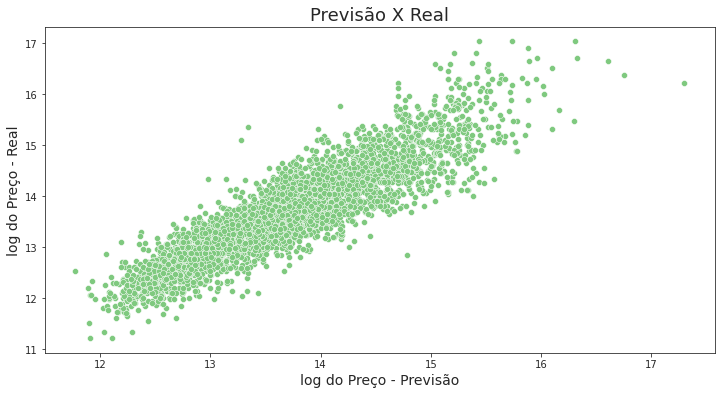

In [105]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax